# Project 1: Netflix Movie Trends in the 1990s

## Objective
Analyze Netflix movie data to uncover patterns in movie durations and genre trends during the 1990s.

## Tools Used
- **Python Libraries**: pandas, matplotlib
- **Techniques**: Data filtering, type conversion, value counts, histogram visualization

## Key Questions
1. What was the most common movie duration in the 1990s?
2. How many short action movies (< 90 minutes) were released in that decade?

## Summary of Findings
- The most frequent duration was **94 minutes**, showing a standard movie length for the 1990s.
- Only **7 short action movies** were released in that time period, indicating a preference for longer runtimes in that genre.


In [41]:
# import Python librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# load the netflix data set as pandas data frame
Netflix = pd.read_csv("netflix_data.csv")

1.0 Data Preview and Inspection

In [43]:
# to see first 5 columns of data frame
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [44]:
# to see last 5 columns of data frame
Netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
4811,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas


In [45]:
# To see column: missing values in each column, column data type, and memory usage.
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [46]:
# Generate summary statistics for all numeric columns in the Netflix DataFrame
netflix_df.describe()

NameError: name 'netflix_df' is not defined

In [ ]:
# calculated the percentage of missing values per column 
missing_pct = (Netflix.isnull().sum() / len(Netflix)) * 100

In [ ]:
# Display the percentage of missing values count for each column: filter only columns with missing values, but since the result is an empty Series
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False).round(2) 
print(missing_pct)

Series([], dtype: float64)


Data types and conversion

In [ ]:
# Display the data type of each column in the Netflix DataFrame
Netflix.dtypes



show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
duration                 int64
description             object
genre                   object
dtype: object

Convert data_added to date variable

In [ ]:
# Convert the "date_added" column to datetime format; invalid entries are set to NaT (Not a Time)
Netflix["date_added"] = pd.to_datetime(Netflix["date_added"], errors="coerce")

Categorical EDA

In [ ]:
# Return a pandas series: Count the frequency of each unique category in the "type" column.
Netflix["type"].value_counts()

type
Movie      4677
TV Show     135
Name: count, dtype: int64

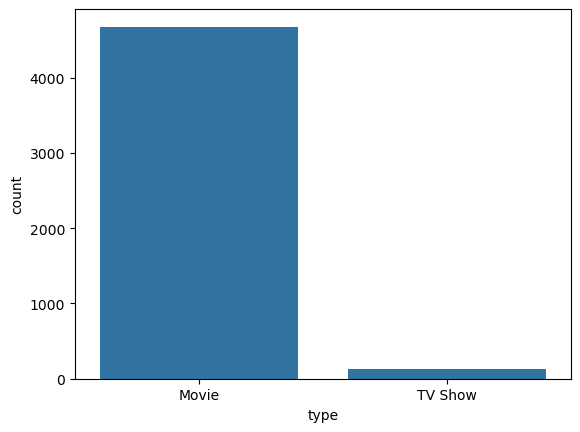

In [ ]:
sns.countplot(data= Netflix, x="type")
plt.show()

In [ ]:
# Return a pandas series: Count the proportion of each unique category in the "type" column.
Netflix["type"].value_counts(normalize=True)

type
Movie      0.971945
TV Show    0.028055
Name: proportion, dtype: float64

In [ ]:
Netflix["country"].value_counts()

country
United States     1886
India              864
United Kingdom     311
Canada             155
France             133
                  ... 
Venezuela            1
Zimbabwe             1
Namibia              1
Soviet Union         1
Croatia              1
Name: count, Length: 72, dtype: int64

In [ ]:
Netflix["country"].value_counts(normalize=True)

country
United States     0.391937
India             0.179551
United Kingdom    0.064630
Canada            0.032211
France            0.027639
                    ...   
Venezuela         0.000208
Zimbabwe          0.000208
Namibia           0.000208
Soviet Union      0.000208
Croatia           0.000208
Name: proportion, Length: 72, dtype: float64

In [ ]:
print(Netflix["country"].nunique())

72


In [ ]:
Netflix["genre"].value_counts()

genre
Dramas                  1343
Comedies                1029
Action                   696
Children                 421
Documentaries            352
Stand-Up                 283
Horror Movies            239
International Movies     100
Classic Movies            69
Thrillers                 49
International TV          39
Crime TV                  30
Uncategorized             25
Independent Movies        20
British TV                20
Anime Features            18
Music                     14
Sci-Fi                    11
Cult Movies               11
Kids                      10
Anime Series               9
Docuseries                 7
TV Shows                   4
Romantic Movies            3
TV Comedies                3
TV Action                  2
Romantic TV                1
TV Horror                  1
Classic                    1
Reality TV                 1
LGBTQ Movies               1
Name: count, dtype: int64

In [ ]:
Netflix["genre"].value_counts(normalize=True)

genre
Dramas                  0.279094
Comedies                0.213840
Action                  0.144638
Children                0.087490
Documentaries           0.073150
Stand-Up                0.058811
Horror Movies           0.049667
International Movies    0.020781
Classic Movies          0.014339
Thrillers               0.010183
International TV        0.008105
Crime TV                0.006234
Uncategorized           0.005195
Independent Movies      0.004156
British TV              0.004156
Anime Features          0.003741
Music                   0.002909
Sci-Fi                  0.002286
Cult Movies             0.002286
Kids                    0.002078
Anime Series            0.001870
Docuseries              0.001455
TV Shows                0.000831
Romantic Movies         0.000623
TV Comedies             0.000623
TV Action               0.000416
Romantic TV             0.000208
TV Horror               0.000208
Classic                 0.000208
Reality TV              0.000208
LGBT

In [ ]:
print(Netflix["genre"].nunique())

31


Filter Movies to the 1990s

In [ ]:
# Filter Movies to the 1990s
movies_df = Netflix[Netflix["type"] == "Movie"].copy()

In [ ]:
# Filter movies released in the 1990s
movies_90s = movies_df[(movies_df["release_year"] >= 1990) & (movies_df["release_year"] < 2000)]


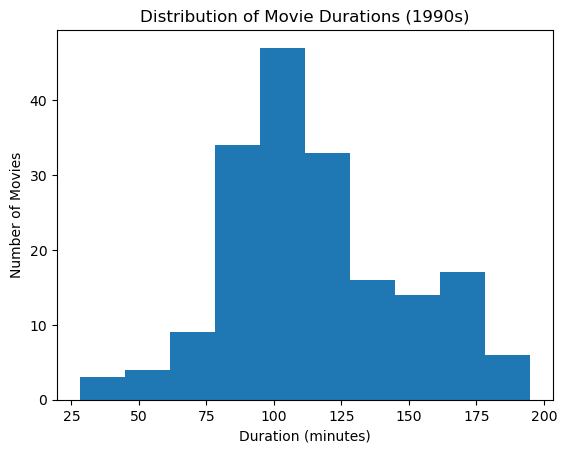

In [ ]:
# Visualize the distribution of movie durations
plt.hist(movies_90s["duration"])
plt.title("Distribution of Movie Durations (1990s)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()

In [ ]:
min_date = movies_90s["release_year"].min()
max_date = movies_90s["release_year"].max()
print(min_date)
print(max_date)


1990
1999


Answer Question 1: Most Frequent Movie Duration

In [ ]:
# Find the most frequent duration
duration = movies_90s["duration"].mode()[0]  # mode returns a Series, so take the first
print("Most frequent duration:", duration)

Most frequent duration: 94


Interpretation:

A duration of 94 minutes suggests that typical 1990s films leaned toward a standard feature-length format — long enough for storytelling but concise enough for wide audience appeal.

This insight aligns with industry patterns from that era, where movies often ranged between 90–120 minutes.

Answer Question 2: Count Short Action Movies < 90 min

In [ ]:
# Filter Action movies from the 1990s
short_action = movies_90s[(movies_90s["genre"] == "Action") & (movies_90s["duration"] < 90)]

# Count how many Action movies had a duration under 90 minutes
short_action_count = (short_action["duration"] < 90).sum()

#short_movie_count = short_action.shape[0]
print("Short Action Movies:", short_movie_count)

Short Action Movies: 7


Interpretation:

Action movies during the 1990s were generally longer than 90 minutes, likely due to their complex plots, action sequences, and production style.

The relatively small number (7 out of all action movies) implies that short-form action content was rare, possibly limited to niche markets or lower-budget productions.

## Insights

- A majority of 1990s Netflix movies are around **94 minutes**, suggesting a consistent production format.
- **Action** movies during the same decade were **rarely shorter than 90 minutes**, hinting at genre-driven runtime requirements.

---

## Next Steps

- Extend the analysis to other genres or time periods (2000s, 2010s)
- Add more complex filters (e.g., by country or rating)
- Consider clustering movies by duration + genre + country for pattern discovery (Project 2)

---

## Portfolio Use

This project demonstrates ability to:
- Clean and preprocess a real-world dataset
- Apply basic statistics and visualization
- Answer business-relevant questions using data